### Imports

In [3]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import statistics
import pandas as pd
import seaborn as sns

In [4]:
from main import *
from ataques_optimos import *
from constantes_tp2 import *

### Mediciones 5000

In [7]:
# Teniendo en cuenta que el maximo de mis datos es de 
data_sizes = list(range(1, 5000, 100))
puntos = []

for n in data_sizes:
    # print(n/5000)

    # Vamos a correr varias veces el algoritmo para sacar un tiempo promedio
    tiempos_aux = [] 
    for i in range(5): 
        # Creamos un set de arribos random
        arribos = [random.randint(1, 10000) for _ in range(n)]

        # Generar lista de valores de recarga crecientes
        valores_recarga = sorted([random.randint(1, 10000) for _ in range(n)], reverse=True)

        inicio_tiempo = time.time()  # Iniciar medición de tiempo
        
        enemigos_eliminados = obtener_valores_optimos_ataque(arribos,valores_recarga)[0]

        fin_tiempo = time.time()  # Finalizar medición de tiempo

        tiempo_total = fin_tiempo - inicio_tiempo  # Calcular tiempo total
        tiempos_aux.append(tiempo_total)

    puntos.append(statistics.mean(tiempos_aux))


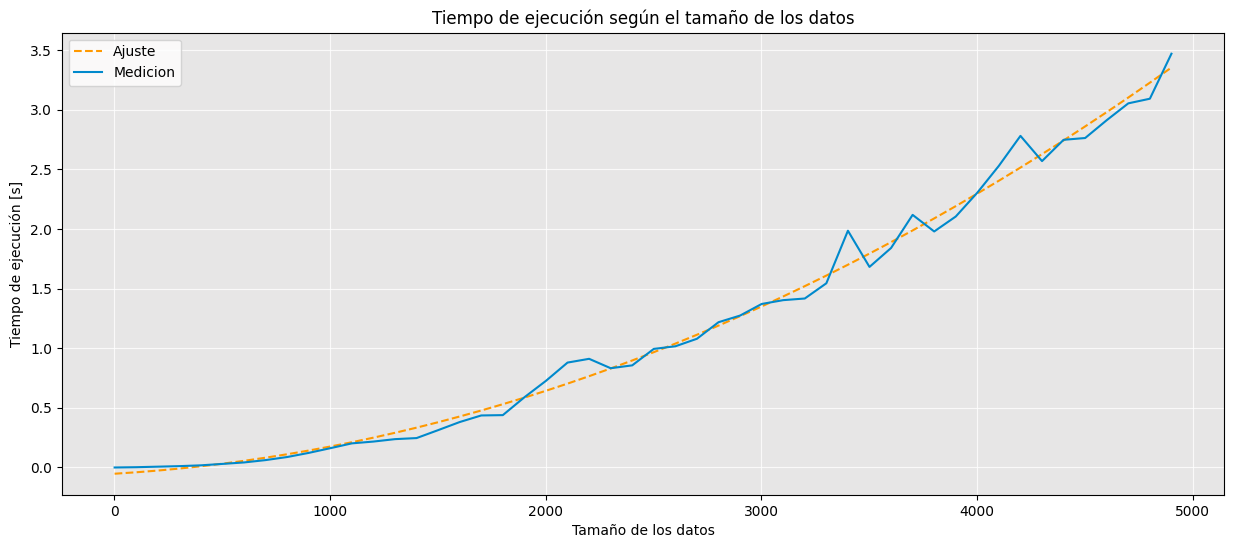

In [10]:
# Graficar los puntos en forma de scatter
fig, ax = plt.subplots(figsize=(15, 6))

p = np.poly1d(np.polyfit(data_sizes, puntos, 2))
ax.plot(data_sizes, p(data_sizes), '--',color='#ff9900', label='Ajuste')

ax.plot(data_sizes, puntos,'-',color='#0089cc', label='Medicion')
ax.grid()
ax.set_xlabel('Tamaño de los datos')
ax.set_ylabel('Tiempo de ejecución [s]')
ax.set_title('Tiempo de ejecución según el tamaño de los datos')
ax.set_facecolor('#E7E6E6')
ax.grid(color='white', alpha=0.8)

plt.legend()

In [11]:
np.polyfit(data_sizes, puntos, 2)

array([ 1.19790529e-07,  1.08118562e-04, -5.24018438e-02])

In [12]:
valores_predichos = p(data_sizes)

np.mean((puntos - valores_predichos) ** 2)

0.00774691532778384

### Mediciones 20000

In [13]:
# Teniendo en cuenta que el maximo de mis datos es de 5000 y tarda bastante ya pongo como tope 10000 
data_sizes = list(range(0, 20000, 500))
puntos = []

for n in data_sizes:
    print(n/20000)
    # Creamos un set de arribos random
    arribos = [random.randint(1, 10000) for _ in range(n)]

    # Generar lista de valores de recarga crecientes
    valores_recarga = sorted([random.randint(1, 10000) for _ in range(n)], reverse=True)

    inicio_tiempo = time.time()  # Iniciar medición de tiempo
    
    enemigos_eliminados = obtener_valores_optimos_ataque(arribos,valores_recarga)[0]

    fin_tiempo = time.time()  # Finalizar medición de tiempo

    tiempo_total = fin_tiempo - inicio_tiempo  # Calcular tiempo total

    puntos.append(tiempo_total)

0.0
0.025
0.05
0.075
0.1
0.125
0.15
0.175
0.2
0.225
0.25
0.275
0.3
0.325
0.35
0.375
0.4
0.425
0.45
0.475
0.5
0.525
0.55
0.575
0.6
0.625
0.65
0.675
0.7
0.725
0.75
0.775
0.8
0.825
0.85
0.875
0.9
0.925
0.95
0.975


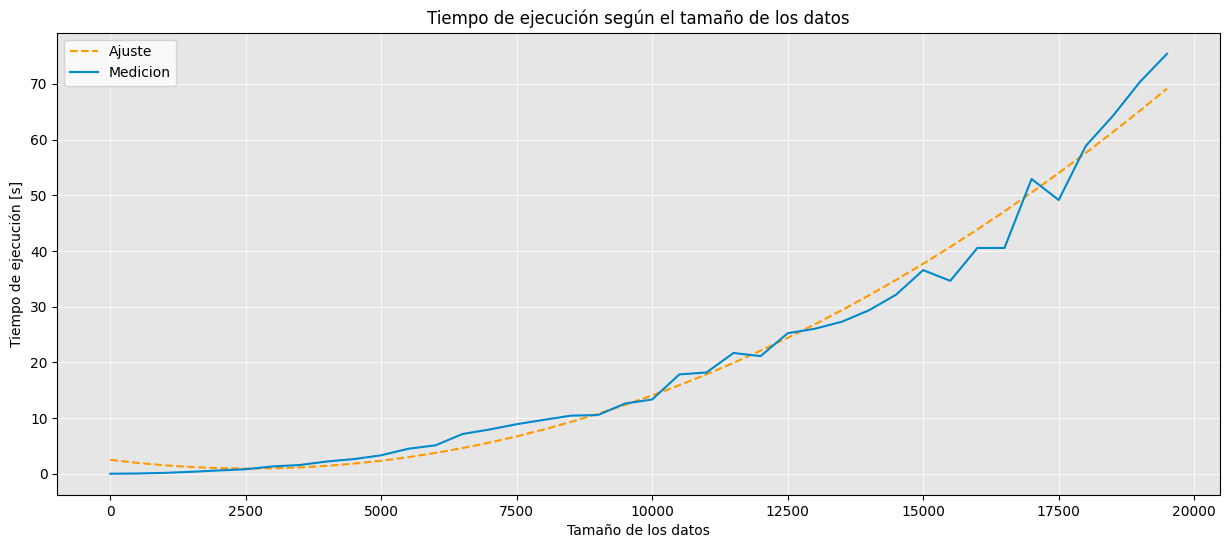

In [14]:
puntos_aux = puntos
# Graficar los puntos en forma de scatter
fig, ax = plt.subplots(figsize=(15, 6))

p = np.poly1d(np.polyfit(data_sizes, puntos_aux, 2))
ax.plot(data_sizes, p(data_sizes), '--',color='#ff9900', label='Ajuste')

ax.plot(data_sizes, puntos_aux,'-',color='#0089cc', label='Medicion')
ax.grid()
ax.set_xlabel('Tamaño de los datos')
ax.set_ylabel('Tiempo de ejecución [s]')
ax.set_title('Tiempo de ejecución según el tamaño de los datos')
ax.set_facecolor('#E7E6E6')
ax.grid(color='white', alpha=0.8)

plt.legend()

In [15]:
np.polyfit(data_sizes, puntos, 2)

array([ 2.38035139e-07, -1.22321871e-03,  2.49682086e+00])

In [16]:
valores_predichos = p(data_sizes)

np.mean((puntos - valores_predichos) ** 2)

6.669883677122203

### Mediciones pruebas curso

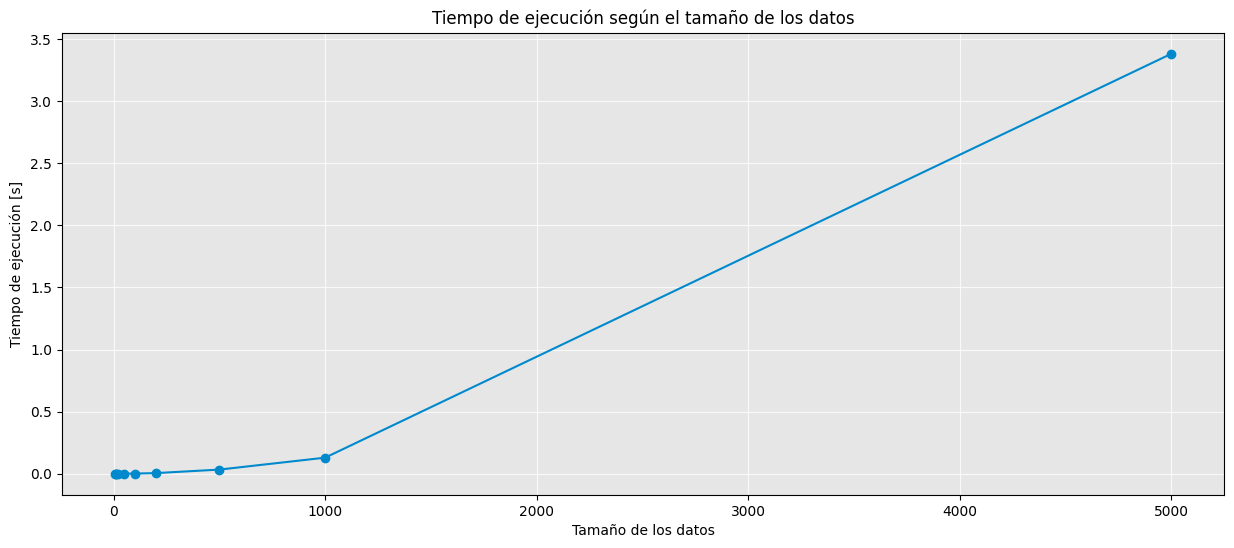

In [51]:
from constantes_tp2 import ARCHIVOS_DE_PRUEBA, DIRECTORIO_DATOS

puntos = []
data_sizes = []

for archivo in ARCHIVOS_DE_PRUEBA:
    # Vamos a correr varias veces el algoritmo para sacar un timepo promedio
    tiempos_aux = [] 
    n, arribos, valores_recarga =  leer_archivo_prueba('.'+DIRECTORIO_DATOS+archivo) 
    data_sizes.append(n)
    for i in range(5): 

        inicio_tiempo = time.time()  # Iniciar medición de tiempo

        enemigos_eliminados = ataques_optimos(n, arribos, valores_recarga)

        fin_tiempo = time.time()  # Finalizar medición de tiempo
        tiempo_total = fin_tiempo - inicio_tiempo  # Calcular tiempo total
        tiempos_aux.append(tiempo_total)

    puntos.append(statistics.mean(tiempos_aux))

#Graficamos los puntos
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(data_sizes, puntos, marker='o',color='#0089cc')
ax.grid()
ax.set_xlabel('Tamaño de los datos')
ax.set_ylabel('Tiempo de ejecución [s]')
ax.set_title('Tiempo de ejecución según el tamaño de los datos')
ax.set_facecolor('#E7E6E6')
ax.grid(color='white', alpha=0.8)